In [280]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [281]:
homepath = os.environ['HOMEPATH']
print(homepath)
path = os.path.join(homepath,"FlightPricePredict")
print(path)

\Users\Lenovo
\Users\Lenovo\FlightPricePredict


In [282]:
df_path = os.path.join(path,"Data_Train")
df = pd.read_excel(df_path+".xlsx")

In [283]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [284]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [285]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

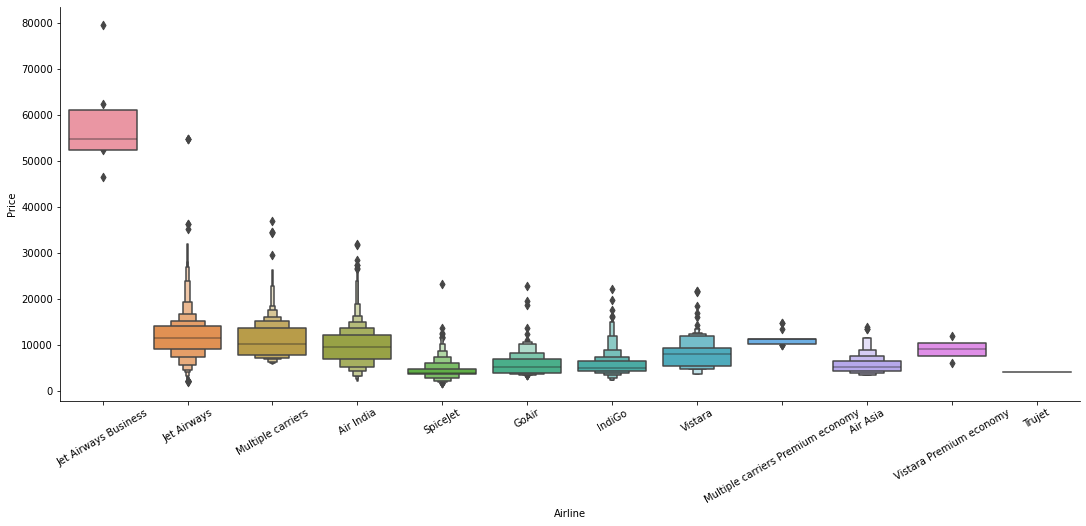

In [39]:
# plt.xticks(rotation=45)
# sns.boxplot(x=df['Airline'],y=df['Price'])

sns.catplot(y='Price', x='Airline', data=df.sort_values('Price',ascending=False),kind='boxen',height=6, aspect=2.5)
plt.xticks(rotation=30)
plt.show()

In [38]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

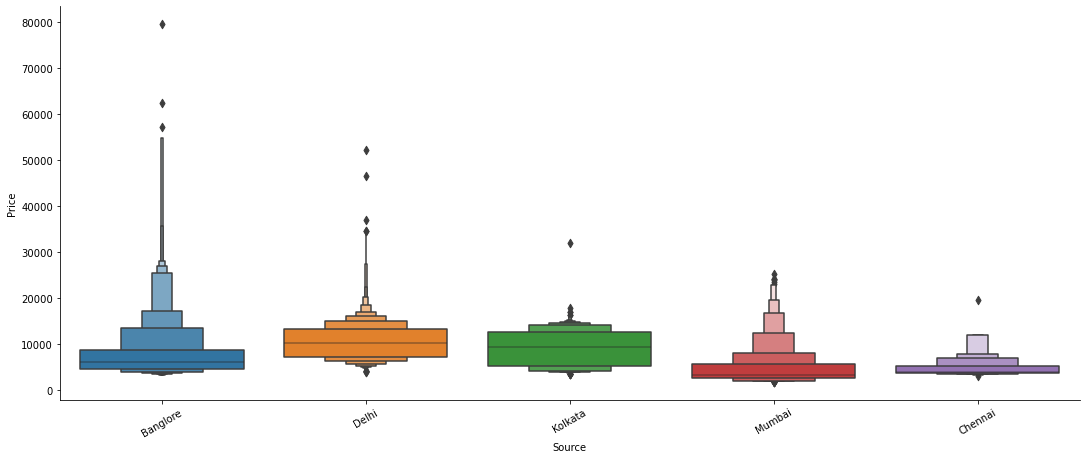

In [40]:
sns.catplot(y='Price', x='Source', data=df.sort_values('Price',ascending=False),kind='boxen',height=6, aspect=2.5)
plt.xticks(rotation=30)
plt.show()

In [76]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

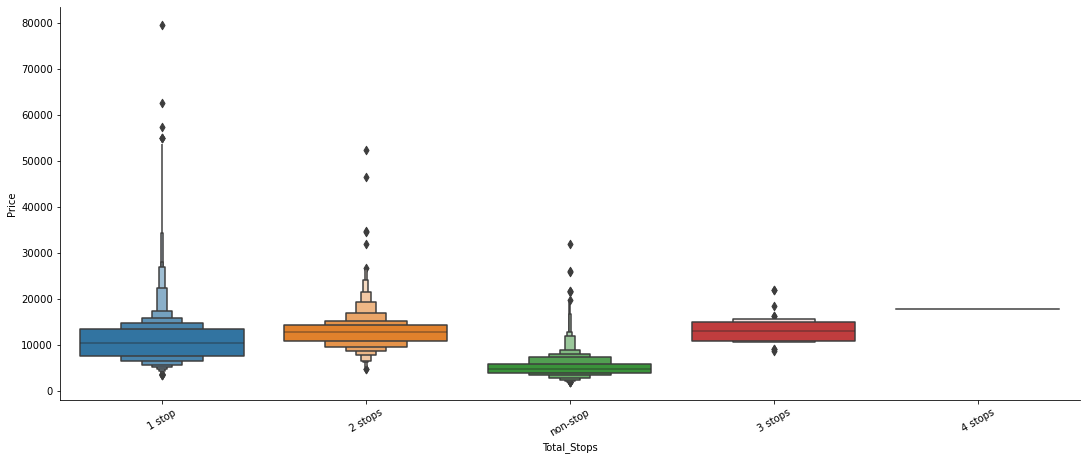

In [77]:
sns.catplot(y='Price', x='Total_Stops', data=df.sort_values('Price',ascending=False),kind='boxen',height=6, aspect=2.5)
plt.xticks(rotation=30)
plt.show()

In [286]:
# df['Journey_day']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
# df['Journey_month']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month

day_list=list(df['Date_of_Journey'])
for i in range(len(day_list)):
    day_list[i] = int(day_list[i].split(sep="/")[0])
    
month_list=list(df['Date_of_Journey'])
for i in range(len(month_list)):
    month_list[i] = int(month_list[i].split(sep="/")[1])

df['Journey_day'] = day_list
df['Journey_month'] = month_list
df1= df.drop(['Date_of_Journey'], axis=1)  #df but with Date of Journey dropped

In [287]:
#splitting Departure Time into Departure Hour and Departure Minute

Dep_Hour=np.zeros(len(df1))
Dep_Min=np.zeros(len(df1))
t=0
for i in df1['Dep_Time']:
    x,y= i.split(":")
    Dep_Hour[t] = x
    Dep_Min[t] = y
    t+=1

df1['Dep_Hour'] = Dep_Hour
df1['Dep_Min'] = Dep_Min

In [288]:
#splitting Arrival Time into Arrival Hour and Arrival Minute
#alternate way

df1["Arrival_hour"] = pd.to_datetime(df1.Arrival_Time).dt.hour
df1["Arrival_min"] = pd.to_datetime(df1.Arrival_Time).dt.minute


In [289]:
df1.tail()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19.0,55.0,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20.0,45.0,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8.0,20.0,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11.0,30.0,14,10
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,9,5,10.0,55.0,19,15


In [290]:
#Now to split duration into hours and mins
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i] 

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [291]:
df1["Duration_hours"] = duration_hours
df1["Duration_mins"] = duration_mins

In [292]:
df1.tail()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19.0,55.0,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20.0,45.0,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8.0,20.0,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11.0,30.0,14,10,2,40
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,9,5,10.0,55.0,19,15,8,20


In [293]:
df2 = df1.drop(['Dep_Time', 'Arrival_Time', 'Duration', 'Route', 'Additional_Info'], axis=1)

In [294]:
df2.tail()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19.0,55.0,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20.0,45.0,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8.0,20.0,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11.0,30.0,14,10,2,40
10682,Air India,Delhi,Cochin,2 stops,11753,9,5,10.0,55.0,19,15,8,20


In [295]:
df2.to_csv(os.path.join(path,'dropped_values.csv'))

In [296]:
df2 = pd.read_csv(os.path.join(path,'dropped_values.csv'))
df2 = df2.iloc[:,1:] #to remove extra unnamed column

## Now to turn categorical variables Source,Destination,No.of stops into dummy variables via encoding

In [297]:
Airline = df2[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

Src = df2[['Source']]
Src = pd.get_dummies(Src, drop_first=True)
Src.head()

Dest = df2[['Destination']]
Dest = pd.get_dummies(Dest, drop_first=True)
Dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [298]:
df2.replace({"non-stop" : 0, "1 stop" : 1, "2 stops" : 2, "3 stops" : 3, "4 stops" : 4}, inplace=True)

In [299]:
df2.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22.0,20.0,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5.0,50.0,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9.0,25.0,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18.0,5.0,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16.0,50.0,21,35,4,45


In [300]:
df3 = pd.concat([df2, Airline, Src, Dest], axis=1)


In [301]:
df3.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace=True)

In [302]:
df3.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22.0,20.0,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5.0,50.0,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9.0,25.0,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18.0,5.0,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16.0,50.0,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [303]:
#df3.to_csv(os.path.join(path,'df3_prepared.csv'), index=False)

In [304]:
df_prep = pd.read_csv(os.path.join(path,'df3_prepared.csv'))

In [305]:
df_prep.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22.0,20.0,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5.0,50.0,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9.0,25.0,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18.0,5.0,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16.0,50.0,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## xxxxxxxxxxxxx Doing the same procedure for Test Data xxxxxxxxxxxxx

In [228]:
test_df_path = os.path.join(path,"Test_set")
test_df = pd.read_excel(test_df_path+".xlsx")

In [229]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [230]:
test_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [231]:
test_df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)


In [232]:
test_df.dropna(inplace=True)
test_df.shape

(2671, 8)

In [213]:
#this was creating problems; unexpected NaN values created.


#test_df['Journey_day']=pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y", errors='ignore').dt.day
#test_df['Journey_month']=pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y", errors='raise').dt.month

In [236]:
day_list=list(test_df['Date_of_Journey'])
for i in range(len(day_list)):
    day_list[i] = int(day_list[i].split(sep="/")[0])
    
month_list=list(test_df['Date_of_Journey'])
for i in range(len(month_list)):
    month_list[i] = int(month_list[i].split(sep="/")[1])

In [237]:
test_df['Journey_day'] = day_list
test_df['Journey_month'] = month_list

In [238]:
test_df.tail()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Journey_day,Journey_month
2666,Air India,6/06/2019,Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,1 stop,6,6
2667,IndiGo,27/03/2019,Kolkata,Banglore,14:20,16:55,2h 35m,non-stop,27,3
2668,Jet Airways,6/03/2019,Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,1 stop,6,3
2669,Air India,6/03/2019,Delhi,Cochin,04:00,19:15,15h 15m,1 stop,6,3
2670,Multiple carriers,15/06/2019,Delhi,Cochin,04:55,19:15,14h 20m,1 stop,15,6


In [239]:
test_df['Dep_Hour'] = pd.to_datetime(test_df.Dep_Time).dt.hour
test_df['Dep_Min'] = pd.to_datetime(test_df.Dep_Time).dt.minute

In [240]:
test_df['Arrival_hour'] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df['Arrival_min'] = pd.to_datetime(test_df.Arrival_Time).dt.minute

In [241]:
duration = list(test_df['Duration'])

for i in range(len(duration)):
    if( duration[i].split() != 2 ):
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i].strip()
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [242]:
test_df['Duration_hours'] = duration_hours
test_df['Duration_mins'] = duration_mins

In [243]:
test_df.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)

In [244]:
Airline = test_df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
#Airline.head()
Src = test_df[['Source']]
Src = pd.get_dummies(Src, drop_first=True)
#Src.head()
Dest = test_df[['Destination']]
Dest = pd.get_dummies(Dest, drop_first=True)
#Dest.head()

In [245]:
test_df2= pd.concat([test_df, Airline, Src, Dest], axis=1) 

In [247]:
test_df2.tail()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Journey_day,Journey_month,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
2666,Air India,6/06/2019,Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,1,6,6,...,0,0,0,1,0,0,0,0,0,0
2667,IndiGo,27/03/2019,Kolkata,Banglore,14:20,16:55,2h 35m,0,27,3,...,0,0,0,1,0,0,0,0,0,0
2668,Jet Airways,6/03/2019,Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,1,6,3,...,0,0,1,0,0,1,0,0,0,0
2669,Air India,6/03/2019,Delhi,Cochin,04:00,19:15,15h 15m,1,6,3,...,0,0,1,0,0,1,0,0,0,0
2670,Multiple carriers,15/06/2019,Delhi,Cochin,04:55,19:15,14h 20m,1,15,6,...,0,0,1,0,0,1,0,0,0,0


In [248]:
test_df3 = test_df2.drop(['Airline', 'Date_of_Journey', 'Source',
                          'Destination', 'Dep_Time', 'Arrival_Time', 'Duration'], axis=1)

In [250]:
test_df3.tail()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
2666,1,6,6,20,30,20,25,23,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,...,0,0,1,0,0,1,0,0,0,0
2670,1,15,6,4,55,19,15,14,20,0,...,0,0,1,0,0,1,0,0,0,0


In [251]:
#test_df3.to_csv(os.path.join(path,"Test_prepared.csv"), index=False)

In [252]:
prepared_test = pd.read_csv(os.path.join(path,"Test_prepared.csv"))
prepared_test.tail()                        

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
2666,1,6,6,20,30,20,25,23,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,...,0,0,1,0,0,1,0,0,0,0
2670,1,15,6,4,55,19,15,14,20,0,...,0,0,1,0,0,1,0,0,0,0
